In [ ]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path = './AB_NYC_2019.csv'
df = pd.read_csv(path)

df.head()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [20]:
pd.DataFrame(df.isnull().sum(), columns = ['Count Null'])

,Count Null
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [21]:
def to_today(date1):
    date2= datetime.datetime.strptime('2019-12-31',"%Y-%m-%d")
    if date1<date2:
        num=(date2-date1).days
        return num
    else:
        return 100000
df['last_review'] = pd.to_datetime(df['last_review'])
df['reviews_per_month'].fillna(0, inplace = True)
df['last_review_to_today'] = df['last_review'].apply(lambda x:to_today(x))
df.drop(['id','host_id','host_name','last_review'], axis=1, inplace=True) 

[Text(0, 0, 'Manhattan'),
 Text(1, 0, 'Brooklyn'),
 Text(2, 0, 'Queens'),
 Text(3, 0, 'Bronx'),
 Text(4, 0, 'Staten Island')]

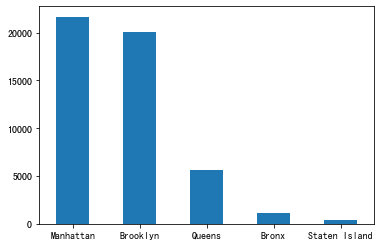

In [24]:
viz_nbhg = df.neighbourhood_group.value_counts().plot(kind = 'bar')
viz_nbhg.set_xticklabels(viz_nbhg.get_xticklabels(), rotation=0)

[Text(0, 0, 'Entire home/apt'),
 Text(1, 0, 'Private room'),
 Text(2, 0, 'Shared room')]

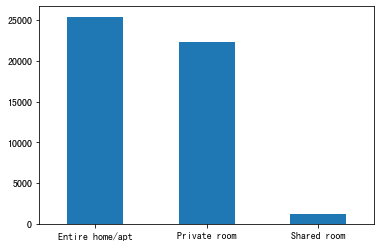

In [28]:
viz_rm = df.room_type.value_counts().plot(kind=  'bar')
viz_rm.set_xticklabels(viz_rm.get_xticklabels(), rotation = 0)

[Text(0, 0, 'Williamsburg'),
 Text(1, 0, 'Bedford-Stuyvesant'),
 Text(2, 0, 'Harlem'),
 Text(3, 0, 'Bushwick'),
 Text(4, 0, 'Upper West Side'),
 Text(5, 0, "Hell's Kitchen"),
 Text(6, 0, 'East Village'),
 Text(7, 0, 'Upper East Side'),
 Text(8, 0, 'Crown Heights'),
 Text(9, 0, 'Midtown')]

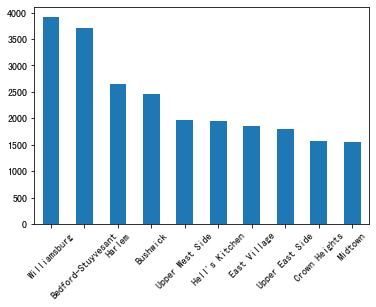

In [25]:
viz_nbh = df.neighbourhood.value_counts().head(10).plot(kind= 'bar')
viz_nbh.set_xticklabels(viz_nbh.get_xticklabels(), rotation=45)

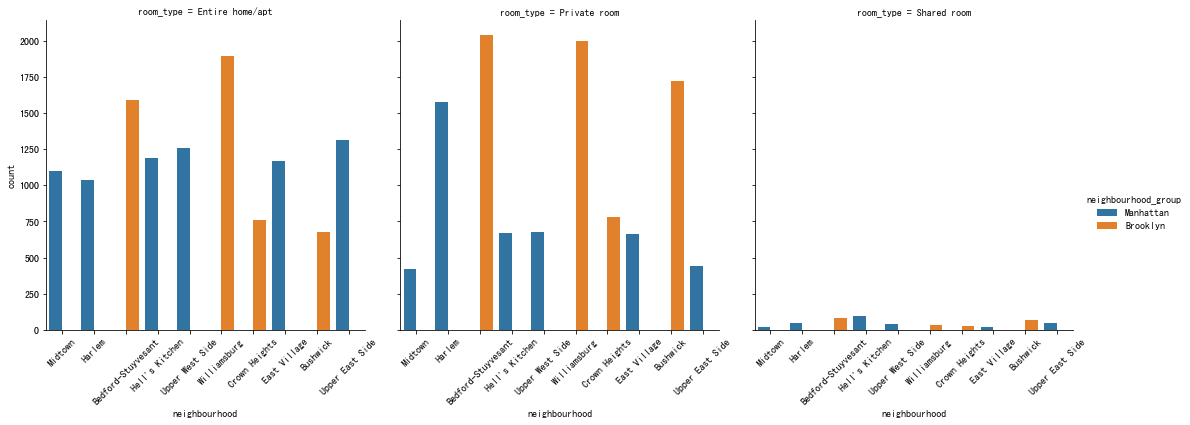

In [29]:
sns.catplot(x = 'neighbourhood', hue = 'neighbourhood_group', col = 'room_type', 
            data = df.loc[df['neighbourhood'].isin( df.neighbourhood.value_counts().head(10).index)],
            kind = 'count').set_xticklabels(rotation=45)

Proportion of data sets：97.47%, 100.00%, 93.77%, 93.50%,99.04%,76.54%,


<AxesSubplot:xlabel='neighbourhood_group', ylabel='last_review_to_today'>

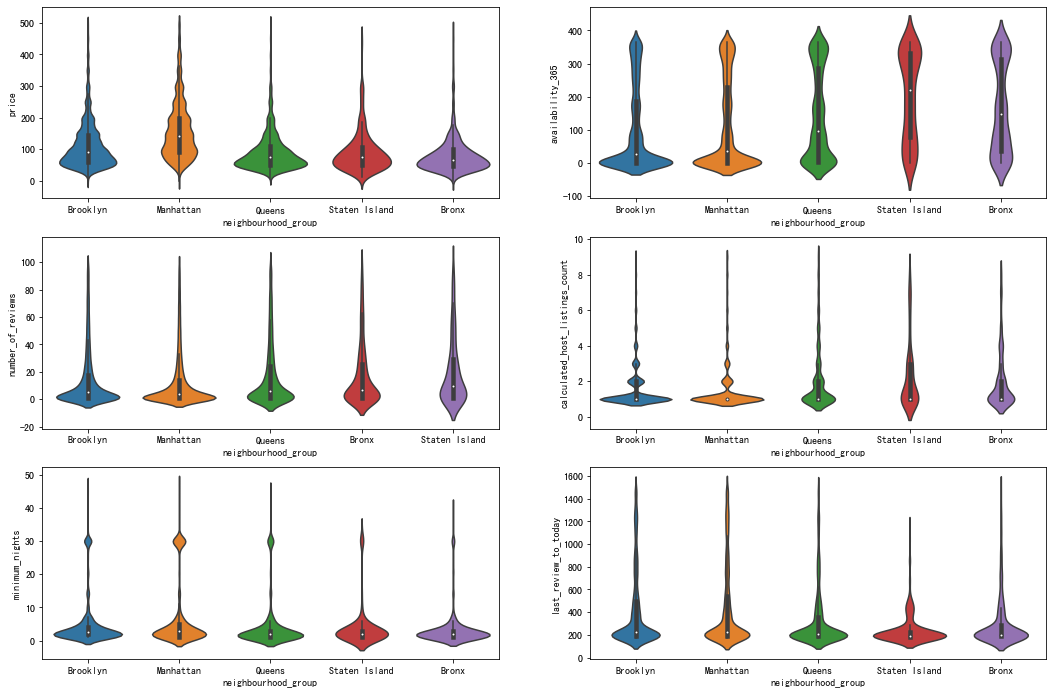

In [32]:
fig=plt.figure(4,figsize=(18,12))
ax1=fig.add_subplot(3,2,1)
ax2=fig.add_subplot(3,2,2)
ax3=fig.add_subplot(3,2,3)
ax4=fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)
ax6=fig.add_subplot(3,2,6)

ax_1_per = 100*len(df[df.price<500])/len(df)
ax_2_per = 100*len(df)/len(df)
ax_3_per = 100*len(df[df.number_of_reviews<100])/len(df)
ax_4_per = 100*len(df[df.calculated_host_listings_count<10])/len(df)
ax_5_per = 100*len(df[df.minimum_nights < 50])/len(df)
ax_6_per = 100*len(df[df.last_review_to_today<1500])/len(df)

print('Proportion of data sets：%.2f%%, %.2f%%, %.2f%%, %.2f%%,%.2f%%,%.2f%%,' %(ax_1_per, ax_2_per, ax_3_per, ax_4_per, ax_5_per, ax_6_per))
sns.violinplot(x = 'neighbourhood_group', y = 'price',data = df[df.price<500], ax = ax1)
sns.violinplot(x = 'neighbourhood_group', y = 'availability_365',data = df, ax = ax2)
sns.violinplot(x = 'neighbourhood_group', y = 'number_of_reviews',data = df[df.number_of_reviews<100], ax= ax3)
sns.violinplot(x = 'neighbourhood_group', y = 'calculated_host_listings_count',data = df[df.calculated_host_listings_count<10], ax= ax4)
sns.violinplot(x = 'neighbourhood_group', y = 'minimum_nights',data = df[df.minimum_nights < 50], ax= ax5)
sns.violinplot(x = 'neighbourhood_group', y = 'last_review_to_today',data = df[df.last_review_to_today<1500], ax= ax6)

Proportion of data sets：97.47%, 100.00%, 93.77%, 93.50%,99.04%,76.54%,


<AxesSubplot:xlabel='room_type', ylabel='last_review_to_today'>

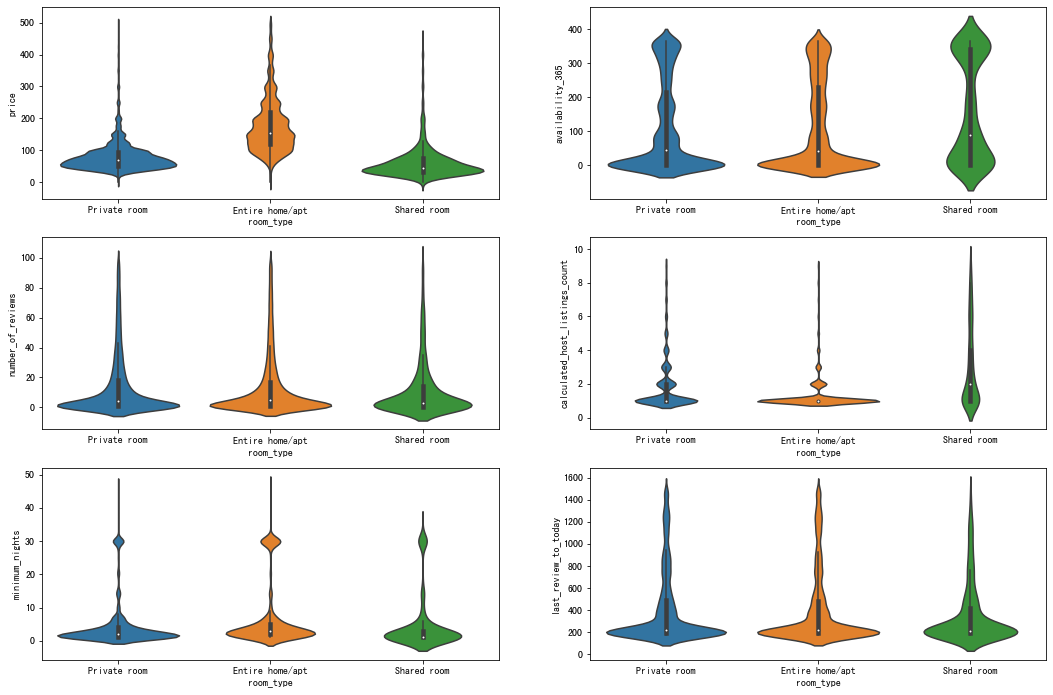

In [33]:
fig=plt.figure(4,figsize=(18,12))
ax1=fig.add_subplot(3,2,1)
ax2=fig.add_subplot(3,2,2)
ax3=fig.add_subplot(3,2,3)
ax4=fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)
ax6=fig.add_subplot(3,2,6)

ax_1_per = 100*len(df[df.price<500])/len(df)
ax_2_per = 100*len(df)/len(df)
ax_3_per = 100*len(df[df.number_of_reviews<100])/len(df)
ax_4_per = 100*len(df[df.calculated_host_listings_count<10])/len(df)
ax_5_per = 100*len(df[df.minimum_nights < 50])/len(df)
ax_6_per = 100*len(df[df.last_review_to_today<1500])/len(df)

print('Proportion of data sets：%.2f%%, %.2f%%, %.2f%%, %.2f%%,%.2f%%,%.2f%%,' %(ax_1_per, ax_2_per, ax_3_per, ax_4_per, ax_5_per, ax_6_per))
sns.violinplot(x = 'room_type', y = 'price',data = df[df.price<500], ax = ax1)
sns.violinplot(x = 'room_type', y = 'availability_365',data = df, ax = ax2)
sns.violinplot(x = 'room_type', y = 'number_of_reviews',data = df[df.number_of_reviews<100], ax= ax3)
sns.violinplot(x = 'room_type', y = 'calculated_host_listings_count',data = df[df.calculated_host_listings_count<10], ax= ax4)
sns.violinplot(x = 'room_type', y = 'minimum_nights',data = df[df.minimum_nights < 50], ax= ax5)
sns.violinplot(x = 'room_type', y = 'last_review_to_today',data = df[df.last_review_to_today<1500], ax= ax6)

Text(0.5, 1.05, 'Pearson Correlation of Number Features')

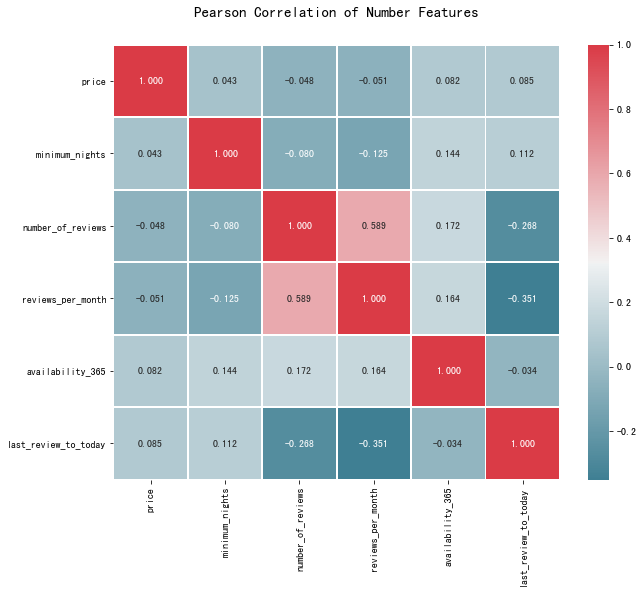

In [34]:
num_field = [
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'availability_365',
'last_review_to_today',
]
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df[num_field].corr(),annot=True,
                    cmap = sns.diverging_palette(220, 10, as_cmap = True),
                    linewidths=.9, fmt= '.3f',ax = ax)
plt.title('Pearson Correlation of Number Features', y=1.05, size=15)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

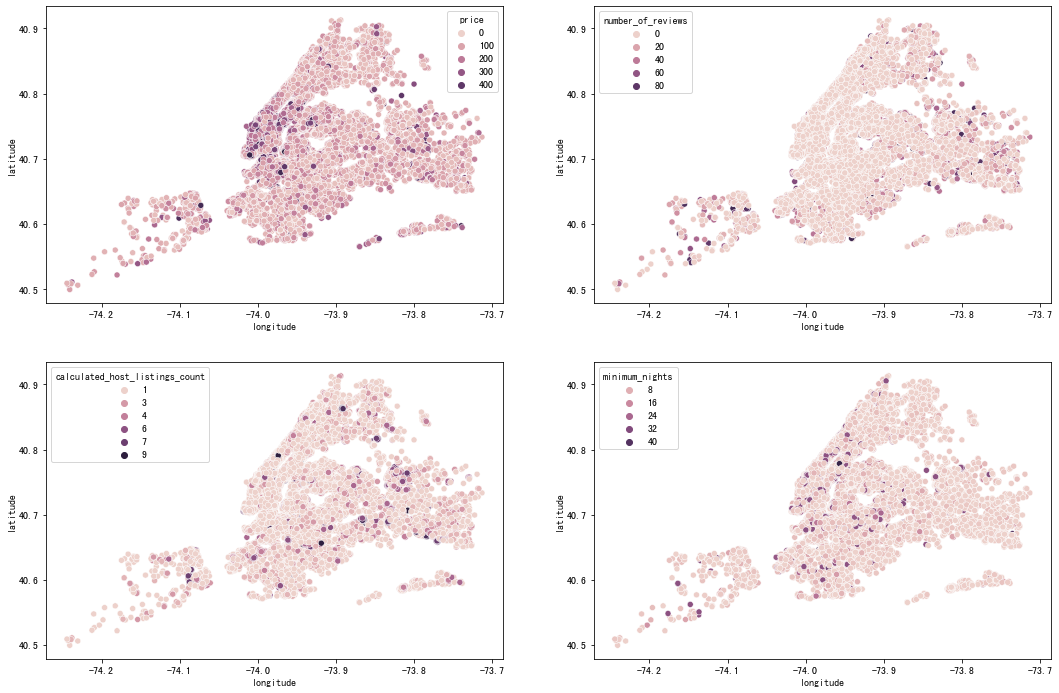

In [35]:
fig=plt.figure(4,figsize=(18,12))

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

sns.scatterplot(x= 'longitude', y='latitude', hue = 'price', data = df[df.price < 500], ax=ax1)
sns.scatterplot(x= 'longitude', y='latitude', hue = 'number_of_reviews', data = df[df.number_of_reviews<100], ax=ax2)
sns.scatterplot(x= 'longitude', y='latitude', hue = 'calculated_host_listings_count', data = df[df.calculated_host_listings_count<10], ax=ax3)
sns.scatterplot(x= 'longitude', y='latitude', hue = 'minimum_nights', data = df[df.minimum_nights < 50], ax=ax4)

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

disperse_features=df[cag_col]
disperse_feature=pd.get_dummies(disperse_features)
print(disperse_feature.head())
continuous_col = ['latitude', 'longitude','price', 'minimum_nights', 'number_of_reviews','reviews_per_month','availability_365', 'last_review_to_today']
continuous_features = df[continuous_col]
scaler=StandardScaler()
continuous_features=scaler.fit_transform(continuous_features)
print(continuous_features.shape)
print(continuous_features)

   neighbourhood_group  neighbourhood  room_type
0                    1            108          1
1                    2            127          0
2                    2             94          1
3                    1             41          0
4                    2             61          0
(48895, 8)
[[-1.4938492  -0.43765209 -0.01549307 ... -0.55151094  1.91625031
  -0.50905911]
 [ 0.45243602 -0.68463915  0.30097355 ... -0.4450791   1.84027456
  -0.51437834]
 [ 1.46839948  0.22249666 -0.01132904 ... -0.68298556  1.91625031
   1.96567576]
 ...
 [ 1.57348017  0.07582101 -0.15707024 ... -0.68298556 -0.65173008
   1.96567576]
 [ 0.52377353 -0.84388081 -0.4069123  ... -0.68298556 -0.84166946
   1.96567576]
 [ 0.64352518 -0.8050995  -0.2611711  ... -0.68298556 -0.68212038
   1.96567576]]


In [65]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

cag_col = [
        'neighbourhood_group', 'neighbourhood', 'room_type',
]
x_col = ['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month','availability_365', 'last_review_to_today']
y_col = ['calculated_host_listings_count']
#处理类型字段
label = LabelEncoder()
for i in cag_col:
    df[i] = label.fit_transform(df[i])
X = df[x_col]
Y = df[y_col]
#数据集分割
#X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0)
random_state = 42
# first split to separate out the test set
X_other, X_test, y_other, y_test = train_test_split(X,Y,test_size = 0.2,random_state=random_state)
print(X_other.shape,y_other.shape)
print('test set:',X_test.shape,y_test.shape)

# do KFold split on other
kf = KFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('   training set:',X_train.shape, y_train.shape) 
    print('   validation set:',X_val.shape, y_val.shape) 
    # the validation set contains different points in each iteration
    print(X_val.head())
    


(39116, 11) (39116, 1)
test set: (9779, 11) (9779, 1)
   training set: (31292, 11) (31292, 1)
   validation set: (7824, 11) (7824, 1)
       neighbourhood_group  neighbourhood  latitude  longitude  room_type  \
7275                     3            220  40.74705  -73.89564          1   
46572                    2            201  40.76786  -73.95639          0   
19902                    2            209  40.73316  -74.00476          0   
38560                    2             64  40.72330  -73.97882          1   
34913                    1             13  40.68440  -73.93580          0   

       price  minimum_nights  number_of_reviews  reviews_per_month  \
7275      38               5                 13               0.25   
46572    260               7                  1               1.00   
19902    147               1                 42               1.32   
38560     79               1                  4               0.61   
34913    125               2                 51      